SELECT  c.scheme_fk,scheme_name, ms_fk, c.dep_fk as dependent_no,upper(dep_type) as dep_type,gender,first_name,surname,birth_date, claim_fk, claim_date, pr_fk as practice_no,pr_descr as doctor_name, pr_type,pr_type_descr, pr_group_descr, tariff_fk, claim_type, c.claim_code,description as claim_code_description
,icd10_fk,icd10_descr, three_letter_level as icd10_group_description, auth_fk, units, pmb, 
(Case WHEN c.claim_code = 'K' THEN 'Y' 
		WHEN c.claim_code IN ('C','P') AND c.claim_code = '80' THEN 'Y' 
		WHEN pr_type = '62' AND c.claim_code = '31' THEN 'Y'
		WHEN pr_type IN ('87','88','90') THEN 'Y'
		ELSE 'N' 
	END) as In_Hospital_Indicator,

claimed_amount, benefit_amount,


(case when (claimed_amount > 0 AND benefit_amount = 0) and paid_date is not null then 'Rejected' else
case when ((claimed_amount > 0 AND benefit_amount > 0)) and paid_date is not null then 'Paid' else
case when claimed_amount> 0 and benefit_amount > 0  and paid_date is null and assess_date is not null then 'Pending' else 'Unpaid' end end end ) as "ClaimsStatus",rcvd_date,
assess_date, paid_date,tariff_amount, discount,owes, override, gen_no, suspend_until, suspended, assessed_datetime
	FROM mipbi_dbo.tf_claim_head_curr c
	left join mipst_dbo.tsd_ccdesc cc on c.claim_code=cc.claim_code and scheme_fk=scheme_code::int
	left join mipst_dbo.tsd_icd10 on icd10_fk=icd10_pk 
	left join mipst_dbo.tsd_practice on pr_fk=pr_pk
	left join mipst_dbo.tsd_provider on pr_type_pk=pr_type
	left join mipbi_dbo.td_beneficiary b on ms_pk=ms_fk and b.scheme_fk=c.scheme_fk and b.dep_fk=c.dep_fk
	where claim_date>=20200101;

Morning @all 

7:41 AM
@Kajol we are trying to extract data for clients/patients who are registered for chronic medication .  I this something you are familiar with?

Kajol, 7:41 AM

@Kajol
christowstrydom, Today at 7:41 AM
yes , i know


7:46 AM
That is such good news!  Can you draw all data that will highlight members / patients who re registered and the nature of the condition? I assume the condition will have an ICD 10 code attached to it?

Kajol, 7:50 AM
Okay will do


Yes, there is an ICD code, which linked to the chronic conditions


7:55 AM
Ok how do I derive the data set of patients that are currently registered for chronic medicine?


Kajol, 8:09 AM
@christowstrydom The data of Chronic Members goes to "mipst_dbo.tsd_depcond" table and for description we join the table "tsd_condition".


We link them with "mipbi_dbo_beneficiary" using member no. and dep_no if the data from beneficiary is available in "mipst_dbo.tsd_depcond" we marked them as Yes else No for Chronic identification

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

In [141]:
import matplotlib as mpl

In [2]:
import pandas as pd
import openpyxl
import win32com.client

In [3]:
import matplotlib.font_manager
from IPython.core.display import HTML

In [185]:
import datetime
x = datetime.datetime(1900, 1, 1)
from datetime import date
today = date.today()

In [289]:
from datetime import datetime,timedelta

In [196]:
datetime(2020,1,1)

datetime.datetime(2020, 1, 1, 0, 0)

In [4]:
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

In [186]:
today

datetime.date(2021, 1, 18)

In [5]:
code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [6]:
# template_name='automated_loss_ratio_report_template.xlsx'
# report_name='{group_name} - care range gap cover - {year} claims experience.pdf'.format(group_name=group_name,year=year)
file_name='data-1610005188424.csv'
file_path='C:\\Users\\christo.strydom\\github_repos\\fraud_project\\data\\'
file=file_path+file_name
df=pd.read_csv(filepath_or_buffer=file)

In [7]:
df['ms_fk_id']=df['ms_fk'].astype(str)+'_'+df['dependent_no'].astype(str).apply(lambda x: x.zfill(2))

In [8]:
list(df)

['scheme_fk',
 'scheme_name',
 'ms_fk',
 'dependent_no',
 'dep_type',
 'gender',
 'first_name',
 'surname',
 'birth_date',
 'claim_fk',
 'claim_date',
 'practice_no',
 'doctor_name',
 'pr_type',
 'pr_type_descr',
 'pr_group_descr',
 'tariff_fk',
 'claim_type',
 'claim_code',
 'claim_code_description',
 'icd10_fk',
 'icd10_descr',
 'icd10_group_description',
 'auth_fk',
 'units',
 'pmb',
 'in_hospital_indicator',
 'claimed_amount',
 'benefit_amount',
 'ClaimsStatus',
 'rcvd_date',
 'assess_date',
 'paid_date',
 'tariff_amount',
 'discount',
 'owes',
 'override',
 'gen_no',
 'suspend_until',
 'suspended',
 'assessed_datetime',
 'ms_fk_id']

### Dates

In [178]:
df[['birth_date','claim_date','rcvd_date','assess_date','paid_date','suspend_until','assessed_datetime']]

,birth_date,claim_date,rcvd_date,assess_date,paid_date,suspend_until,assessed_datetime
0,19840419.0,20200318,20200412,20200412,NaN,NaN,2020-04-12 13:18:59.726
1,20120111.0,20200105,20200110,20200110,NaN,NaN,2020-01-10 09:54:11.022
2,19810512.0,20200107,20201012,20201012,20201020.0,NaN,2020-10-12 09:25:01.073
3,19911118.0,20200107,20200113,20200113,NaN,NaN,2020-01-13 11:22:38.237
4,20060424.0,20200108,20201029,20201029,20201110.0,NaN,2020-10-29 14:02:40.681
...,...,...,...,...,...,...,...
634782,19840826.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:58:22.909
634783,19641124.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:56:00.743
634784,19641124.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:56:00.623
634785,19700211.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:57:11.09


In [181]:
df['birth_date']=pd.to_datetime(df['birth_date'], format='%Y%m%d', errors='ignore')
df['birth_date_days']=(df['birth_date']-x).dt.days

In [ ]:
# claim_date_py
df['claim_date_py']=pd.to_datetime(df['claim_date'], format='%Y%m%d', errors='ignore')
df['claim_date_days']=(datetime(today.year,today.month,today.day)-df['claim_date_py']).dt.days

In [203]:
df['claim_date_days']

0         306
1         379
2         377
3         377
4         376
         ... 
634782    112
634783    112
634784    112
634785    112
634786    112
Name: claim_date_days, Length: 634787, dtype: int64

#### Age

In [209]:
# df['birth_date']=pd.to_datetime(df['birth_date'], format='%Y%m%d', errors='ignore')
df['age_days']=(datetime(today.year,today.month,today.day)-df['birth_date']).dt.days
df['age']=(datetime(today.year,today.month,today.day)-df['birth_date']).dt.days/365.25

In [211]:
df['age']

0         36.750171
1          9.021218
2         39.687885
3         29.169062
4         14.737851
            ...    
634782    36.396988
634783    56.150582
634784    56.150582
634785    50.934976
634786    56.150582
Name: age, Length: 634787, dtype: float64

In [215]:
df['age'].min()

-150.16016427104722

In [220]:
age_df=df[['ms_fk_id','age']].groupby(['ms_fk_id']).max()

In [224]:
age_filter=(age_df['age']>0)&(age_df['age']<100)

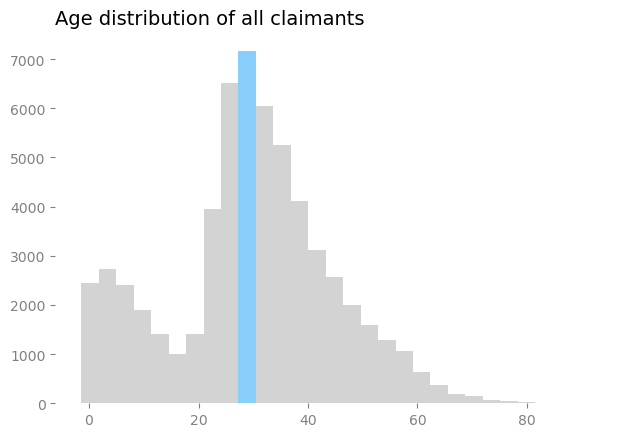

In [281]:

x = age_df[age_filter]['age']
p=list(x)
# patches[40].set_fc('r')
plt.rcdefaults()
ticklabelpad = mpl.rcParams['xtick.major.pad']
fig, ax = plt.subplots()

n, bins, patches = plt.hist(p, density=False, bins=30, align='left', color='lightgrey')
patches[n.argmax()].set_fc('lightskyblue')
# plt.hist(x, density=False, bins=30)  # density=False would make counts
# ax.set_title('Age distribution of all claimants', loc='left', color='lightgrey')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# r = ax.set_yticklabels(ticks, ha = 'left')
# plt.ylabel('Count')
# plt.xlabel('Data');
ax.xaxis.label.set_color('lightgrey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
# ax.annotate('Percentage of the total claimed amount', xy=(0, -1), xycoords=ax.get_yaxis_transform(),xytext=(-5,0), textcoords="offset points", ha="right", va="center")
textstr='Age distribution of all claimants'
# plt.text(-0.4, 0.9, 'Age distribution of all claimants', fontsize=14, transform=plt.gcf().transFigure)
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots/42439154
plt.gcf().text(0, 0.9, textstr, fontsize=14)
plt.subplots_adjust(left=0)
plt.show()

In [333]:
set(list(pd.qcut(df['age'], 10, labels=None, retbins=False, precision=3, duplicates='raise')))

{Interval(-150.161, 14.081, closed='right'),
 Interval(14.081, 25.577, closed='right'),
 Interval(25.577, 28.539, closed='right'),
 Interval(28.539, 31.066, closed='right'),
 Interval(31.066, 33.969, closed='right'),
 Interval(33.969, 37.155, closed='right'),
 Interval(37.155, 41.04, closed='right'),
 Interval(41.04, 46.39, closed='right'),
 Interval(46.39, 54.204, closed='right'),
 Interval(54.204, 121.024, closed='right'),
 nan}

#### claim_date

In [283]:
df['claim_date_py']=pd.to_datetime(df['claim_date'], format='%Y%m%d', errors='ignore')

In [292]:
df['claim_date_py'].max()-timedelta(1)

Timestamp('2021-01-04 00:00:00')

In [290]:
days = timedelta(5)

In [295]:
df['claim_date_age']=(datetime(today.year,today.month,today.day)-df['claim_date_py']).dt.days
df['claim_date_age']

0         306
1         379
2         377
3         377
4         376
         ... 
634782    112
634783    112
634784    112
634785    112
634786    112
Name: claim_date_age, Length: 634787, dtype: int64

In [297]:
claim_date_age_min=df['claim_date_age'].min()

In [298]:
claim_date_age_filter=df['claim_date_age']<(claim_date_age_min+7)

In [302]:
df[claim_date_age_filter]['claim_date_age'].max()

19

In [305]:
df[df['claim_date_age']==claim_date_age_min]

,scheme_fk,scheme_name,ms_fk,dependent_no,dep_type,gender,first_name,surname,birth_date,claim_fk,...,suspended,assessed_datetime,ms_fk_id,birth_date-days,birth_date_days,claim_date_py,claim_date_days,age_days,age,claim_date_age
43738,108,KAELO HEALTH MYHEALTH PLUS,1668343,0,M,F,ZUKISWA,TANABOTI,1975-10-13,219486,...,N,2021-01-06 10:01:51.088,1668343_00,27678.0,27678.0,2021-01-05,13,16534.0,45.267625,13
43739,108,KAELO HEALTH MYHEALTH PLUS,516219,0,M,F,THANDUXOLO CONSPICUO,THENGWA,1981-04-01,219486,...,N,2021-01-06 10:03:38.835,516219_00,29675.0,29675.0,2021-01-05,13,14537.0,39.800137,13
43740,124,KAELO HEALTH MYHEALTH VITAL,1659003,0,M,F,Zandile,Mkhize,1960-09-24,219486,...,N,2021-01-06 10:06:46.18,1659003_00,22181.0,22181.0,2021-01-05,13,22031.0,60.317591,13
43741,124,KAELO HEALTH MYHEALTH VITAL,1661780,1,C,M,TUMELO,PHEA,2013-10-31,219486,...,N,2021-01-06 10:08:55.664,1661780_01,41576.0,41576.0,2021-01-05,13,2636.0,7.216975,13
43742,108,KAELO HEALTH MYHEALTH PLUS,1485622,0,M,M,Ralf,Kuhn,1961-09-23,47413,...,N,2021-01-06 09:36:45.539,1485622_00,22545.0,22545.0,2021-01-05,13,21667.0,59.321013,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525743,124,KAELO HEALTH MYHEALTH VITAL,1692785,0,M,M,Carlo,Hulbert,1981-03-25,219486,...,N,2021-01-06 10:07:39.241,1692785_00,29668.0,29668.0,2021-01-05,13,14544.0,39.819302,13
525744,124,KAELO HEALTH MYHEALTH VITAL,1672291,0,M,M,Marco,Kowa,2000-09-26,219486,...,N,2021-01-06 10:07:43.21,1672291_00,36793.0,36793.0,2021-01-05,13,7419.0,20.312115,13
525745,124,KAELO HEALTH MYHEALTH VITAL,1654515,0,M,F,Ulandi,Bosman,1989-03-05,219486,...,N,2021-01-06 10:07:45.439,1654515_00,32570.0,32570.0,2021-01-05,13,11642.0,31.874059,13
525746,129,KAELO HEALTH MYHEALTH PLUS SI,497511,0,M,M,Bhavnesh,Vala,1990-09-28,47413,...,N,2021-01-06 09:36:47.647,497511_00,33142.0,33142.0,2021-01-05,13,11070.0,30.308008,13


In [315]:
claim_date_age_filter=(df['claim_date_age']>=(claim_date_age_min+7))&(df['claim_date_age']<(claim_date_age_min+14))
set(df[claim_date_age_filter]['claim_date_age'])

{20, 21, 22, 23, 24, 25, 26}

In [319]:
df[claim_date_age_filter]['claim_date_py'].max()

Timestamp('2020-12-29 00:00:00')

In [327]:
def slicedf_fn(slicedf, delta1, delta2):
    claim_date_age_filter=(slicedf['claim_date_age']>=(claim_date_age_min+delta1))&(slicedf['claim_date_age']<(claim_date_age_min+delta2))
    ff=df[claim_date_age_filter][['pr_group_descr','claimed_amount']].groupby(['pr_group_descr']).sum()
    ff.reset_index(inplace=True)
    ff.sort_values(by='claimed_amount',inplace=True,ascending=False)
    ff['cumulative_claimed_amount'] = 100 * (ff['claimed_amount'].cumsum()/ff['claimed_amount'].sum())
    # ff['cumulative_claimed_amount']=ff['cumulative_claimed_amount'].astype('int32')
    # ff['percentaage_claimed_amount']
    ff['percentage_claimed_amount']=ff['claimed_amount']/ff['claimed_amount'].sum()*100
    ff['percentage_claimed_amount']=ff['percentage_claimed_amount'].astype('int32')
    ff['end_date']=df[claim_date_age_filter]['claim_date_py'].max()
    ff['start_date']=df[claim_date_age_filter]['claim_date_py'].min()
    ff.sort_values(by='cumulative_claimed_amount',inplace=True)
    return ff

In [334]:
df0=slicedf_fn(slicedf=df, delta1=0, delta2=7)
df1=slicedf_fn(slicedf=df, delta1=7, delta2=14)
dfg=df0.append(df1,ignore_index = True)

In [335]:
dfg

,pr_group_descr,claimed_amount,cumulative_claimed_amount,percentage_claimed_amount,end_date,start_date
0,Pharmacies/Meds,422276.64,70.108712,70,2021-01-05,2020-12-30
1,General Practice,124516.38,90.781612,20,2021-01-05,2020-12-30
2,Dental,27482.67,95.344438,4,2021-01-05,2020-12-30
3,Radiology,15442.14,97.908227,2,2021-01-05,2020-12-30
4,Optometry,8914.60,99.388279,1,2021-01-05,2020-12-30
5,Pathology,2976.20,99.882404,0,2021-01-05,2020-12-30
6,Specialist,708.30,100.000000,0,2021-01-05,2020-12-30
7,Pharmacies/Meds,307256.69,54.986333,54,2020-12-29,2020-12-23
8,General Practice,165083.01,84.529414,29,2020-12-29,2020-12-23
9,Dental,47230.90,92.981806,8,2020-12-29,2020-12-23


In [349]:
d1=list(set(dfg['end_date']))[0]
d2=list(set(dfg['end_date']))[1]
x1=list(dfg[dfg['end_date']==d1]['end_date'])
x2=list(dfg[dfg['end_date']==d2]['end_date'])
y1=list(dfg[dfg['end_date']==d1]['percentage_claimed_amount'])
y2=list(dfg[dfg['end_date']==d2]['percentage_claimed_amount'])

In [350]:
y1

[54, 29, 8, 3, 2, 1, 0]

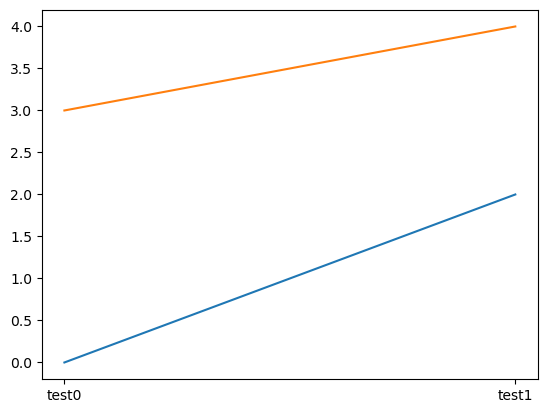

In [353]:
plt.plot(['test0','test1'], [0,2])
plt.plot(['test0','test1'], [3,4])

[Timestamp('2020-12-29 00:00:00'), Timestamp('2021-01-05 00:00:00')] [54, 70]
12/29/2020
[Timestamp('2020-12-29 00:00:00'), Timestamp('2021-01-05 00:00:00')] [29, 20]
12/29/2020
[Timestamp('2020-12-29 00:00:00'), Timestamp('2021-01-05 00:00:00')] [8, 4]
12/29/2020
[Timestamp('2020-12-29 00:00:00'), Timestamp('2021-01-05 00:00:00')] [3, 2]
12/29/2020
[Timestamp('2020-12-29 00:00:00'), Timestamp('2021-01-05 00:00:00')] [2, 1]
12/29/2020
[Timestamp('2020-12-29 00:00:00'), Timestamp('2021-01-05 00:00:00')] [1, 0]
12/29/2020
[Timestamp('2020-12-29 00:00:00'), Timestamp('2021-01-05 00:00:00')] [0, 0]
12/29/2020


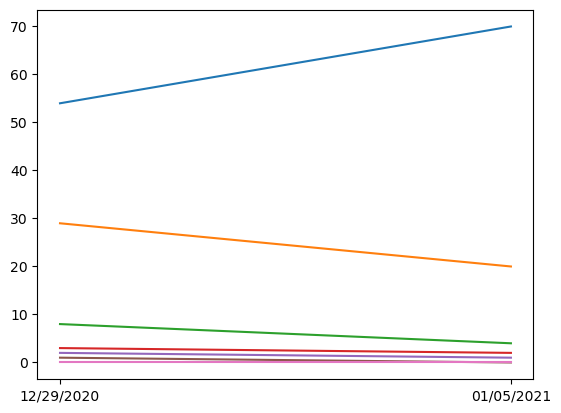

In [357]:
for i in range(len(x1)):
    print([x1[i],x2[i]], [y1[i],y2[i]])
    print(x1[i].strftime('%m/%d/%Y'))
    plt.plot([x1[i].strftime('%m/%d/%Y'),x2[i].strftime('%m/%d/%Y')], [y1[i],y2[i]])

# plt.plot(['test1','test1','test2','test2'], [5,6,4,7], 'ro-')

In [321]:

import matplotlib.pyplot as plt


names = list(dfg.end_date)
values = list(data.values())

fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax.plot(names, values)
fig.suptitle('Categorical Plotting')

In [317]:
claim_date_age_filter=(df['claim_date_age']>=(claim_date_age_min))&(df['claim_date_age']<(claim_date_age_min+7))
ff=df[claim_date_age_filter][['pr_group_descr','claimed_amount']].groupby(['pr_group_descr']).sum()
ff.reset_index(inplace=True)
ff.sort_values(by='claimed_amount',inplace=True,ascending=False)
ff['cumulative_claimed_amount'] = 100 * (ff['claimed_amount'].cumsum()/ff['claimed_amount'].sum())
# ff['cumulative_claimed_amount']=ff['cumulative_claimed_amount'].astype('int32')
# ff['percentaage_claimed_amount']
ff['percentage_claimed_amount']=ff['claimed_amount']/ff['claimed_amount'].sum()*100
ff['percentage_claimed_amount']=ff['percentage_claimed_amount'].astype('int32')

ff.sort_values(by='cumulative_claimed_amount')

,pr_group_descr,claimed_amount,cumulative_claimed_amount,percentage_claimed_amount
4,Pharmacies/Meds,422276.64,70.108712,70
1,General Practice,124516.38,90.781612,20
0,Dental,27482.67,95.344438,4
5,Radiology,15442.14,97.908227,2
2,Optometry,8914.60,99.388279,1
3,Pathology,2976.20,99.882404,0
6,Specialist,708.30,100.000000,0


### Claims

In [9]:
df['claim_code_description']

0                GP CONSULTATION
1                GP CONSULTATION
2                    NIL PAYMENT
3                GP CONSULTATION
4                    NIL PAYMENT
                   ...          
634782    OTC MEDICATION BENEFIT
634783          CHRONIC MEDICINE
634784          CHRONIC MEDICINE
634785    OTC MEDICATION BENEFIT
634786          CHRONIC MEDICINE
Name: claim_code_description, Length: 634787, dtype: object

### Practice

In [10]:
df[['pr_type','pr_type_descr','pr_group_descr']]

,pr_type,pr_type_descr,pr_group_descr
0,14.0,General Medical Practice,General Practice
1,14.0,General Medical Practice,General Practice
2,70.0,Optometrists,Optometry
3,14.0,General Medical Practice,General Practice
4,14.0,General Medical Practice,General Practice
...,...,...,...
634782,61.0,Pharmacotherapist,Pharmacies/Meds
634783,61.0,Pharmacotherapist,Pharmacies/Meds
634784,61.0,Pharmacotherapist,Pharmacies/Meds
634785,61.0,Pharmacotherapist,Pharmacies/Meds


In [11]:
df['claim_code_description'].value_counts()

OTC MEDICATION BENEFIT                    195738
GP CONSULTATION                           135351
NIL PAYMENT                                87831
PRIMARY PATHOLOGY                          38375
ACUTE MEDICINE                             32786
                                           ...  
MATERNITY_GYNAECOLOGY BENEFIT                  4
DEATH COVER - ACCIDENTAL                       4
EMERGENCY ROAD & AIR TRANSPORT BENEFIT         3
PROSTHESIS_INTERNAL BENEFIT                    1
MAJOR MEDICAL RISK                             1
Name: claim_code_description, Length: 72, dtype: int64

In [170]:
df[['birth_date','claim_date','rcvd_date','assess_date','paid_date','suspend_until','assessed_datetime']]

,birth_date,claim_date,rcvd_date,assess_date,paid_date,suspend_until,assessed_datetime
0,19840419.0,20200318,20200412,20200412,NaN,NaN,2020-04-12 13:18:59.726
1,20120111.0,20200105,20200110,20200110,NaN,NaN,2020-01-10 09:54:11.022
2,19810512.0,20200107,20201012,20201012,20201020.0,NaN,2020-10-12 09:25:01.073
3,19911118.0,20200107,20200113,20200113,NaN,NaN,2020-01-13 11:22:38.237
4,20060424.0,20200108,20201029,20201029,20201110.0,NaN,2020-10-29 14:02:40.681
...,...,...,...,...,...,...,...
634782,19840826.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:58:22.909
634783,19641124.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:56:00.743
634784,19641124.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:56:00.623
634785,19700211.0,20200928,20200929,20200929,20201006.0,NaN,2020-09-29 09:57:11.09


In [169]:
df['claim_date']

0         20200318
1         20200105
2         20200107
3         20200107
4         20200108
            ...   
634782    20200928
634783    20200928
634784    20200928
634785    20200928
634786    20200928
Name: claim_date, Length: 634787, dtype: int64

In [12]:
gf=df[['pr_type_descr','claim_code_description','claimed_amount']].groupby(['pr_type_descr','claim_code_description',]).sum()

In [13]:
gf

claimed_amount
pr_type_descr                 claim_code_description                                
Ambulance Services - Advanced AMBULANCE                                    798798.18
                              EMERGENCY ROAD & AIR TRANSPORT BENEFIT         8336.97
                              HOSPITAL BENEFIT                              21385.91
                              IN PATIENT PRIVATE HOSPITAL                   32353.33
                              INPATIENT PRIVATE HOSPITAL                     9584.64
...                                                                              ...
Urology                       HOSPITAL BENEFIT                              37521.65
                              NIL PAYMENT                                   62893.22
                              PRIMARY RADIOLOGY                               409.70
                              SPECIALIST_CONSULTATION BENEFIT               10580.52
                              SPECIALIST_PROCEDURE BENEFIT                  11283.90

[341 rows x 1 columns]

In [14]:
gf.reset_index(inplace=True)

In [15]:
gf.sort_values(by='claimed_amount',inplace=True)

In [16]:
gf['cumulative_claimed_amount'] = 100 * (gf['claimed_amount'].cumsum()/gf['claimed_amount'].sum())

In [17]:
gf

,pr_type_descr,claim_code_description,claimed_amount,cumulative_claimed_amount
213,Paediatrics Independent Practice Specialist,SPECIALIST_PROCEDURE BENEFIT,1.310000e+00,0.000001
145,Independent Practice Specialist Obstetrics and...,BASIC RADIOLOGY BENEFIT,5.601000e+01,0.000045
159,Maxillo-facial and Oral Surgery,DENTISTRY ESSENTIAL,9.210000e+01,0.000117
119,General Medical Practice,OTC MEDICATION BENEFIT,1.131000e+02,0.000206
39,Dental therapy,DENTAL EMERGENCY,1.142000e+02,0.000295
...,...,...,...,...
222,Pathology Independent Practice Specialist,NIL PAYMENT,4.175142e+06,43.289333
224,Pathology Independent Practice Specialist,PRIMARY PATHOLOGY,4.560814e+06,46.860838
117,General Medical Practice,NIL PAYMENT,7.984213e+06,53.113155
246,Pharmacotherapist,OTC MEDICATION BENEFIT,8.607599e+06,59.853637


In [18]:
gf[gf['cumulative_claimed_amount']>20]

,pr_type_descr,claim_code_description,claimed_amount,cumulative_claimed_amount
79,General Dental Practice,DENTAL PREVENTATIVE,1.307175e+06,20.284503
74,General Dental Practice,DENTAL CONSULTATION,1.431649e+06,21.405606
65,Diagnostic Radiology,PRIMARY RADIOLOGY,1.625487e+06,22.678500
180,Optometrists,NIL PAYMENT,1.761461e+06,24.057874
95,General Dental Practice,NIL PAYMENT,1.877387e+06,25.528027
91,General Dental Practice,DENTISTRY ESSENTIAL,2.027466e+06,27.115705
241,Pharmacotherapist,CHRONIC MEDICINE,2.306187e+06,28.921646
275,Private Hospitals ('B' - Status),HOSPITAL BENEFIT,2.326661e+06,30.743619
242,Pharmacotherapist,HIV,2.367024e+06,32.597200
109,General Medical Practice,GP_CONSULTATION BENEFIT,2.566024e+06,34.606615


In [103]:
ff=df[['pr_group_descr','claimed_amount']].groupby(['pr_group_descr']).sum()

ff.reset_index(inplace=True)

ff.sort_values(by='claimed_amount',inplace=True,ascending=False)

ff['cumulative_claimed_amount'] = 100 * (ff['claimed_amount'].cumsum()/ff['claimed_amount'].sum())
# ff['cumulative_claimed_amount']=ff['cumulative_claimed_amount'].astype('int32')

# ff['percentaage_claimed_amount']
ff['percentage_claimed_amount']=ff['claimed_amount']/ff['claimed_amount'].sum()*100
ff['percentage_claimed_amount']=ff['percentage_claimed_amount'].astype('int32')

ff.sort_values(by='cumulative_claimed_amount')

In [162]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a horizantal bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()/2 + rect.get_y() # rect.get_width() #rect.get_y() + rect.get_width() #rect.get_height()
        x_value = rect.get_width() #rect.get_y() # rect.get_height() # rect.get_x() + rect.get_width() / 2

#         print('rect.get_x(): ', rect.get_x(), 'rect.get_y():', rect.get_y() )
#         print('rect.get_height(): ', rect.get_height(), 'rect.get_width():', rect.get_width() )
#         print('x_value: ', x_value, ', y_value: ', y_value) 
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(int(x_value))

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space,0),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va='center',
            horizontalalignment='left',
            verticalalignment='top',
            color='grey')                      # Vertically align label differently for
                                        # positive and negative values.



KeyError: 'pr_group_descr'

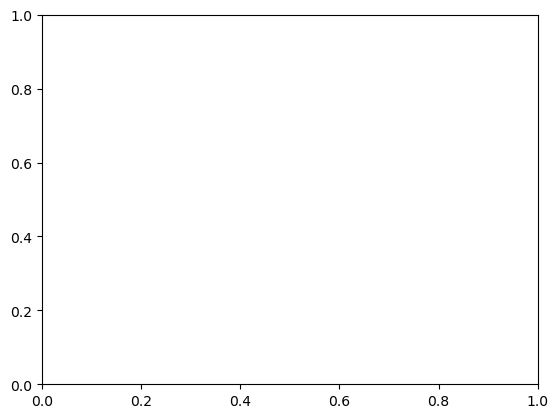

In [306]:
# Fixing random state for reproducibility
# np.random.seed(19680801)


plt.rcdefaults()
ticklabelpad = mpl.rcParams['xtick.major.pad']
fig, ax = plt.subplots()
# Set titles for the figure and the subplot respectively
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

pr_group_descr = list(ff['pr_group_descr'])
y_pos = np.arange(len(pr_group_descr))
performance = list(ff['percentage_claimed_amount'])
# error = np.random.rand(len(people))
# Set the colors
colors = ['blue', 'blue', 'blue', 'blue', 'grey', 'grey', 'grey','grey', 'grey', 'grey']
color = colors
ax.barh(y_pos, performance, align='center',color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(pr_group_descr, color='grey')
ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Performance', loc='left', color='grey')
# ax.set_title('Percentage of the total claimed amount', loc='left', color='grey')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# ax.set_title('start at far left',loc='left',color='red' )

# Call the function above. All the magic happens there.
add_value_labels(ax,15)

# https://stackoverflow.com/questions/61684427/how-to-define-ylabel-position-relative-to-axis-with-matplotlib
# t = ax.text(-0.1, 1.05, 'Y label', rotation=0, verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)

ax.annotate('XLabel', xy=(-0.2,0), xytext=(5, -ticklabelpad), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')

ax.annotate('XLabel2', xy=(0,0), xytext=(5, -ticklabelpad), ha='left', va='top',
            xycoords='figure points', textcoords='offset points')

ax.annotate('Percentage of the total claimed amount', xy=(0, -1), xycoords=ax.get_yaxis_transform(),xytext=(-5,0), textcoords="offset points", ha="right", va="center")

plt.show()

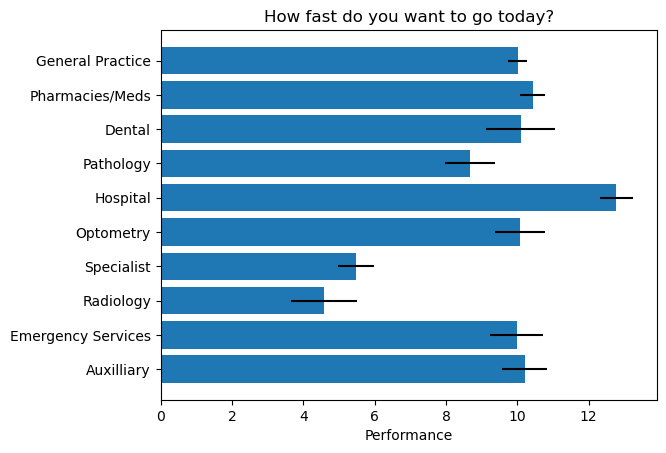

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

people = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim']
people=ff['pr_group_descr']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()
